<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Duplicates Lab**


Estimated time needed: **30** minutes


## Introduction


Data wrangling is a critical step in preparing datasets for analysis, and handling duplicates plays a key role in ensuring data accuracy. In this lab, you will focus on identifying and removing duplicate entries from your dataset. 


## Objectives


In this lab, you will perform the following:


1. Identify duplicate rows in the dataset and analyze their characteristics.
2. Visualize the distribution of duplicates based on key attributes.
3. Remove duplicate values strategically based on specific criteria.
4. Outline the process of verifying and documenting duplicate removal.


## Hands on Lab


Install the needed library


In [2]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 101.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 133.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 117.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 108.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 90.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 83.4 MB/s eta 0:00:00


Import pandas module


In [3]:
import pandas as pd


Import matplotlib


In [4]:
import matplotlib.pyplot as plt


## **Load the dataset into a dataframe**


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


In [5]:
# Load the dataset directly from the URL
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

Load the data into a pandas dataframe:



Note: If you are working on a local Jupyter environment, you can use the URL directly in the pandas.read_csv() function as shown below:



In [ ]:
# df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")


## Identify and Analyze Duplicates


### Task 1: Identify Duplicate Rows
1. Count the number of duplicate rows in the dataset.
3. Display the first few duplicate rows to understand their structure.


In [6]:
## Write your code here
# Count duplicate rows
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

# Display the first few duplicate rows
duplicate_rows = df[df.duplicated()]
print("First few duplicate rows:")
print(duplicate_rows.head())

Number of duplicate rows: 20
First few duplicate rows:
       ResponseId                      MainBranch                 Age  \
65437           1  I am a developer by profession  Under 18 years old   
65438           2  I am a developer by profession     35-44 years old   
65439           3  I am a developer by profession     45-54 years old   
65440           4           I am learning to code     18-24 years old   
65441           5  I am a developer by profession     18-24 years old   

                Employment RemoteWork   Check  \
65437  Employed, full-time     Remote  Apples   
65438  Employed, full-time     Remote  Apples   
65439  Employed, full-time     Remote  Apples   
65440   Student, full-time        NaN  Apples   
65441   Student, full-time        NaN  Apples   

                                        CodingActivities  \
65437                                              Hobby   
65438  Hobby;Contribute to open-source projects;Other...   
65439  Hobby;Contribute to open

### Task 2: Analyze Characteristics of Duplicates
1. Identify duplicate rows based on selected columns such as MainBranch, Employment, and RemoteWork. Analyse which columns frequently contain identical values within these duplicate rows.
2. Analyse the characteristics of rows that are duplicates based on a subset of columns, such as MainBranch, Employment, and RemoteWork. Determine which columns frequently have identical values across these rows.
   


In [7]:
## Write your code here
# Step 1: Find duplicate rows based on specific columns
subset_cols = ['MainBranch', 'Employment', 'RemoteWork']
duplicates_subset = df[df.duplicated(subset=subset_cols, keep=False)]

print(f"Number of duplicate rows based on {subset_cols}: {len(duplicates_subset)}")
print("\nSample of duplicate rows based on selected columns:")
print(duplicates_subset.head())

# Step 2: Group duplicates by the subset to analyze consistency in other columns
grouped = duplicates_subset.groupby(subset_cols)

# Step 3: Analyze which columns frequently have identical values across duplicates
identical_stats = {}

for col in df.columns:
    if col in subset_cols:
        continue  # skip columns used for duplicate identification

    same_value_count = 0
    total_groups = 0

    for _, group in grouped:
        if len(group[col].dropna().unique()) == 1:
            same_value_count += 1
        total_groups += 1

    if total_groups > 0:
        identical_stats[col] = same_value_count / total_groups

# Step 4: Display columns and frequency of identical values in duplicates
print("\nProportion of groups where each column has identical values:")
for col, proportion in sorted(identical_stats.items(), key=lambda x: -x[1]):
    print(f"{col}: {proportion:.2f}")

Number of duplicate rows based on ['MainBranch', 'Employment', 'RemoteWork']: 65290

Sample of duplicate rows based on selected columns:
   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;

### Task 3: Visualize Duplicates Distribution
1. Create visualizations to show the distribution of duplicates across different categories.
2. Use bar charts or pie charts to represent the distribution of duplicates by Country and Employment.


/tmp/ipykernel_300/1053994064.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')


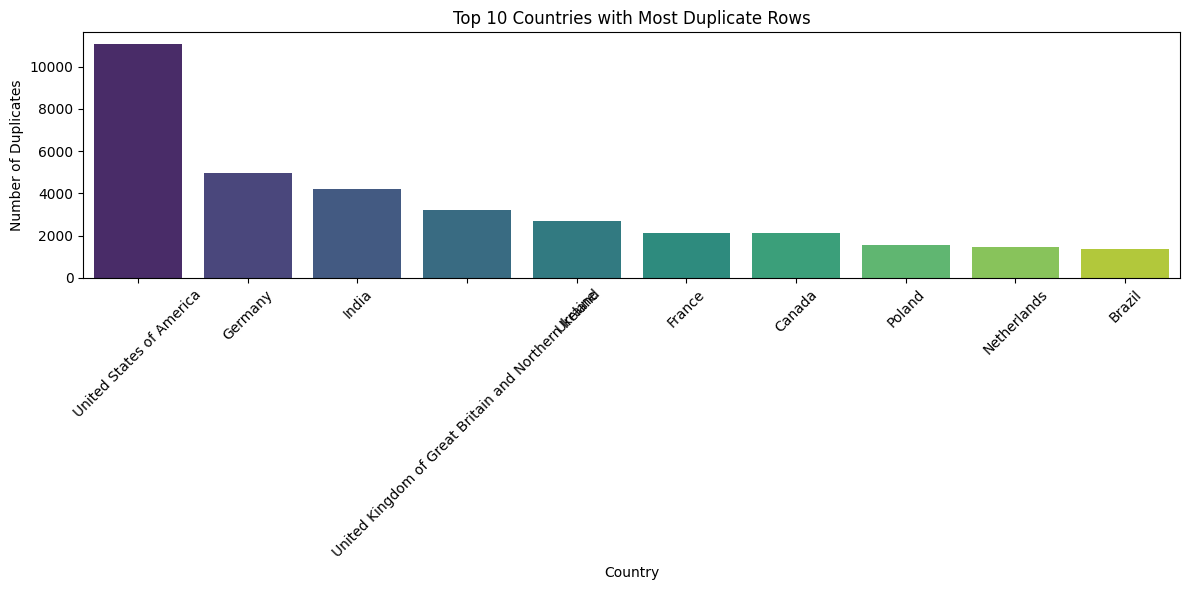

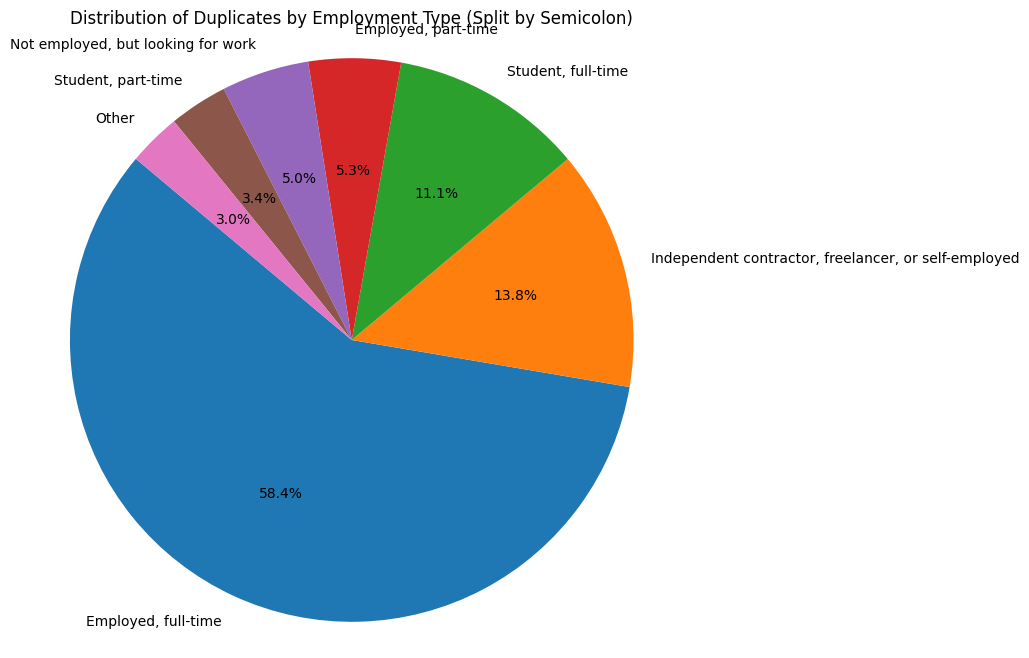

In [9]:
## Write your code here
import seaborn as sns

# Step 1: Find duplicate rows based on specific columns
subset_cols = ['MainBranch', 'Employment', 'RemoteWork']
duplicates = df[df.duplicated(subset=subset_cols, keep=False)]

# Optional: reset index for cleaner plots
duplicates = duplicates.reset_index(drop=True)

# Step 2: Bar plot - distribution of duplicates by Country
plt.figure(figsize=(12, 6))
country_counts = duplicates['Country'].value_counts().head(10)  # Top 10 countries
sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')
plt.title('Top 10 Countries with Most Duplicate Rows')
plt.ylabel('Number of Duplicates')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

from collections import Counter

# Step 3 (Fixed): Pie chart - distribution by Employment (split semicolon entries)
# Split entries by semicolon and flatten the list
employment_split = duplicates['Employment'].dropna().str.split(';')
flat_employment_list = [emp.strip() for sublist in employment_split for emp in sublist]

# Count individual employment types
employment_counts_split = Counter(flat_employment_list)

# Optional: Keep only the top N employment types to avoid clutter
top_n = 6
top_employment = dict(employment_counts_split.most_common(top_n))
other_count = sum([v for k, v in employment_counts_split.items() if k not in top_employment])
top_employment['Other'] = other_count

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_employment.values(), labels=top_employment.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Duplicates by Employment Type (Split by Semicolon)')
plt.axis('equal')  # Equal aspect ratio makes pie chart circular
plt.show()

### Task 4: Strategic Removal of Duplicates
1. Decide which columns are critical for defining uniqueness in the dataset.
2. Remove duplicates based on a subset of columns if complete row duplication is not a good criterion.


In [27]:
## Write your code here
# View number of unique values per column
unique_counts = df.nunique().sort_values()
print("Unique value counts per column:")
print(unique_counts)

key_columns = [
    'ResponseId',                   # Unique identifier
    'LanguageHaveWorkedWith',
    'LanguageWantToWorkWith',
    'ToolsTechHaveWorkedWith',
    'ToolsTechWantToWorkWith'
]

# Drop duplicates based on key content columns
df_deduplicated = df.drop_duplicates(subset=key_columns)

print(f"Original rows: {len(df)}")
print(f"Rows after deduplication: {len(df_deduplicated)}")


Unique value counts per column:
Check                          1
TBranch                        2
ICorPM                         2
RemoteWork                     3
AISelect                       3
                           ...  
ToolsTechWantToWorkWith    16549
ToolsTechHaveWorkedWith    19883
LanguageWantToWorkWith     22769
LanguageHaveWorkedWith     23864
ResponseId                 65437
Length: 114, dtype: int64
Original rows: 65457
Rows after deduplication: 65437


## Verify and Document Duplicate Removal Process


### Task 5: Documentation
1. Document the process of identifying and removing duplicates.


2. Explain the reasoning behind selecting specific columns for identifying and removing duplicates.


### Summary and Next Steps
**In this lab, you focused on identifying and analyzing duplicate rows within the dataset.**

- You employed various techniques to explore the nature of duplicates and applied strategic methods for their removal.
- For additional analysis, consider investigating the impact of duplicates on specific analyses and how their removal affects the results.
- This version of the lab is more focused on duplicate analysis and handling, providing a structured approach to deal with duplicates in a dataset effectively.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11- 05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
